In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from yellowbrick.cluster import SilhouetteVisualizer

import umap
import umap.plot as uplot

from kneed import KneeLocator

from kmodes.kmodes import KModes

from ch_7_consts import SOY_FEATURE_DESCRIPTION

plt.rcParams["figure.figsize"]=(11,7)
sns.set_theme()



In [25]:
soyabean_data_path = r'../../soybean_data_use.csv'

soya_df = pd.read_csv(soyabean_data_path)

soya_df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,august,normal,gt-norm,norm,no,same-lst-yr,scattered,pot-severe,none,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,september,normal,gt-norm,norm,yes,same-lst-sev-yrs,low-areas,pot-severe,fungicide,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,august,normal,gt-norm,norm,yes,same-lst-sev-yrs,scattered,severe,none,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [26]:
n_unique_vals = soya_df.nunique()
n_unique_vals

date               7
plant-stand        2
precip             3
temp               3
hail               2
crop-hist          4
area-damaged       4
severity           2
seed-tmt           2
germination        3
plant-growth       1
leaves             2
leafspots-halo     1
leafspots-marg     1
leafspot-size      1
leaf-shread        1
leaf-malf          1
leaf-mild          1
stem               1
lodging            2
stem-cankers       4
canker-lesion      4
fruiting-bodies    2
external decay     2
mycelium           2
int-discolor       2
sclerotia          2
fruit-pods         2
fruit spots        1
seed               1
mold-growth        1
seed-discolor      1
seed-size          1
shriveling         1
roots              2
class              4
dtype: int64

In [27]:
drop_columns = list(n_unique_vals[n_unique_vals==1].index)
drop_columns

['plant-growth',
 'leafspots-halo',
 'leafspots-marg',
 'leafspot-size',
 'leaf-shread',
 'leaf-malf',
 'leaf-mild',
 'stem',
 'fruit spots',
 'seed',
 'mold-growth',
 'seed-discolor',
 'seed-size',
 'shriveling']

In [28]:
label = soya_df['class']
soya_df = soya_df.drop(columns=['class']+ drop_columns)
soya_df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,lodging,stem-cankers,canker-lesion,fruiting-bodies,external decay,mycelium,int-discolor,sclerotia,fruit-pods,roots
0,august,normal,gt-norm,norm,no,same-lst-yr,scattered,pot-severe,none,lt-80%,...,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,norm
1,september,normal,gt-norm,norm,yes,same-lst-sev-yrs,low-areas,pot-severe,fungicide,lt-80%,...,no,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,norm
2,july,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89%,...,yes,above-sec-nde,dna,present,firm-and-dry,absent,none,absent,norm,norm
3,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100%,...,no,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,norm
4,august,normal,gt-norm,norm,yes,same-lst-sev-yrs,scattered,severe,none,lt-80%,...,yes,above-sec-nde,brown,present,firm-and-dry,absent,none,absent,norm,norm


In [29]:
# calculate the encoded features
encoding = OrdinalEncoder()
encoded_features = encoding.fit_transform(soya_df)

c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\umap\umap_.py:1887: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\Sub\anaconda3\envs\train_dl\lib\site-packages\umap\plot.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

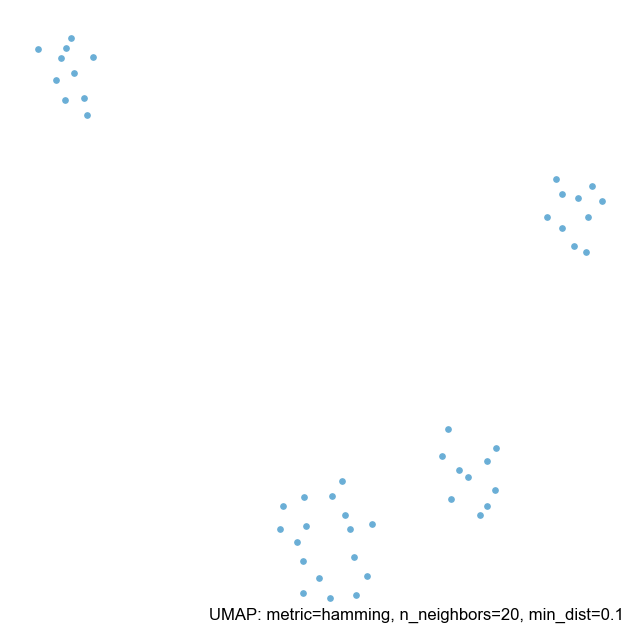

In [32]:
umap_model = umap.UMAP(n_neighbors=20, n_components=2, random_state=42, metric='hamming')
umap_emd_data = umap_model.fit_transform(encoded_features)

uplot.points(umap_model)

<Axes: >

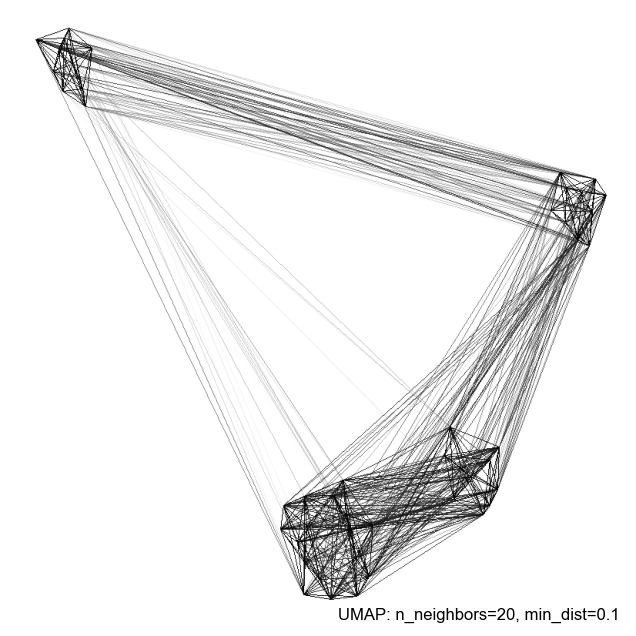

In [33]:
uplot.connectivity(umap_model)

C:\Users\Sub\AppData\Local\Temp\ipykernel_8116\1646059624.py:19: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=umap_emd_data[:,0],
C:\Users\Sub\AppData\Local\Temp\ipykernel_8116\1646059624.py:19: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=umap_emd_data[:,0],
C:\Users\Sub\AppData\Local\Temp\ipykernel_8116\1646059624.py:19: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(x=umap_emd_data[:,0],
C:\Users\Sub\AppData\Local\Temp\ipykernel_8116\1646059624.py:19: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x=umap_emd_data[:,0],
C:\Users\Sub\AppData\Local\Temp\ipykernel_8116\1646059624.py:19: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x=umap_emd_data[:,0],


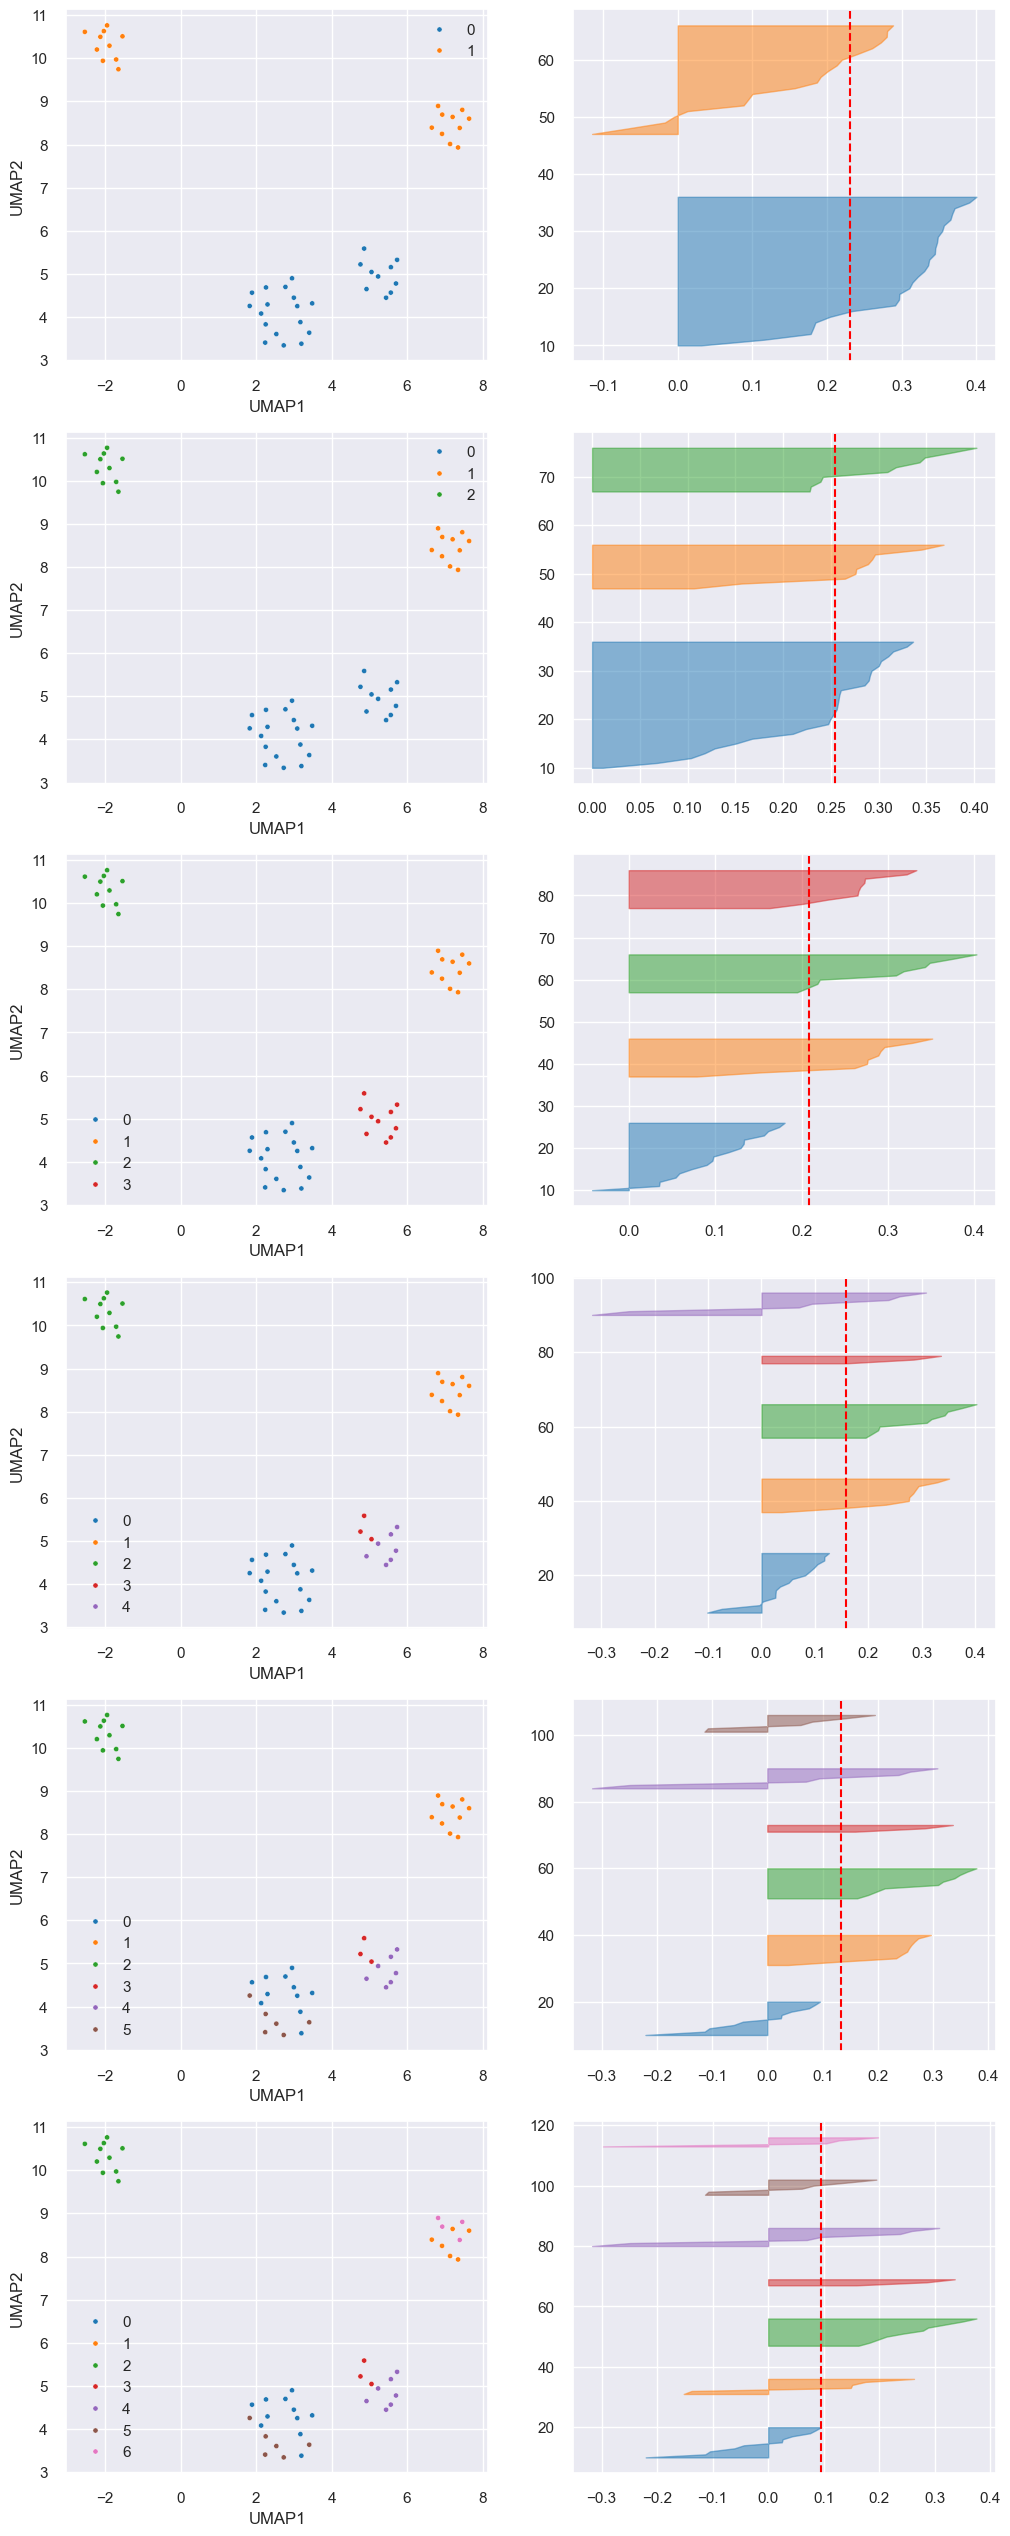

In [49]:
# Perform clustering for multiple k 
candidate_k = [2, 3, 4, 5, 6, 7]

cost_list = []
silhouette_score_list = []

tab10 = list(plt.colormaps['tab10'].colors)

fig, axes = plt.subplots(
    len(candidate_k), 2,
    figsize=(12,32)
)

for i , num_cluster in enumerate(candidate_k):

    kmode = KModes(n_clusters=num_cluster)
    kmode.fit(encoded_features)

    sns.scatterplot(x=umap_emd_data[:,0],
                    y=umap_emd_data[:,1],
                    s=14,
                    palette=tab10,
                    ax=axes[i,0],
                    hue=kmode.labels_)
    
    axes[i,0].set_xlabel('UMAP1')
    axes[i,0].set_ylabel('UMAP2')

    visualizer = SilhouetteVisualizer(kmode,
                                           ax=axes[i,1],
                                           is_fitted=True,
                                           colors=tab10,
                                           metric='hamming')
    
    visualizer.fit(encoded_features)
    cost_list.append(kmode.cost_)
    silhouette_score_list.append(visualizer.silhouette_score_)

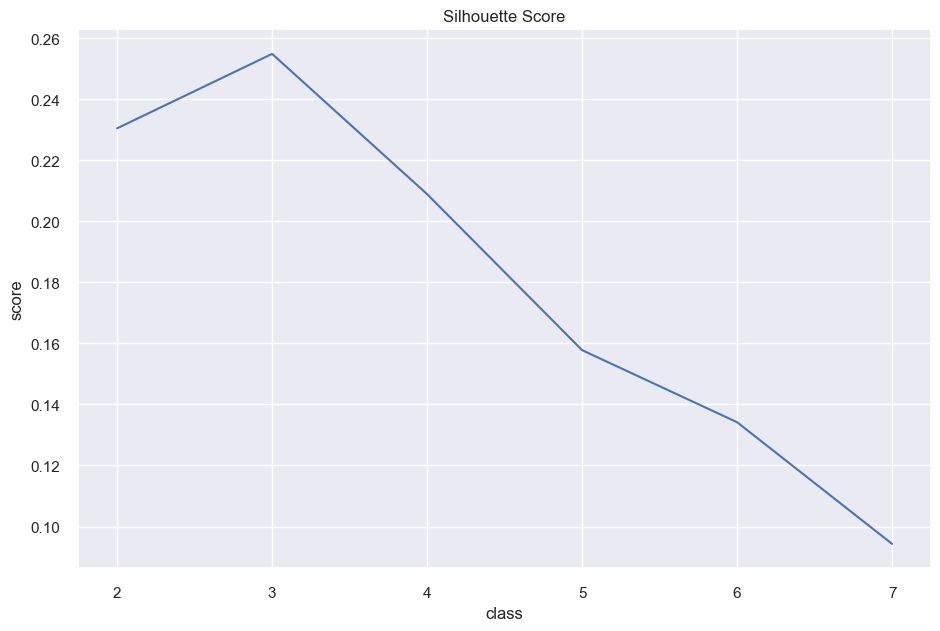

In [50]:
# plot the silhouette score for each class
sns.lineplot(x=candidate_k, y=silhouette_score_list)
plt.title('Silhouette Score')
plt.xlabel('class')
plt.ylabel('score')
plt.show()

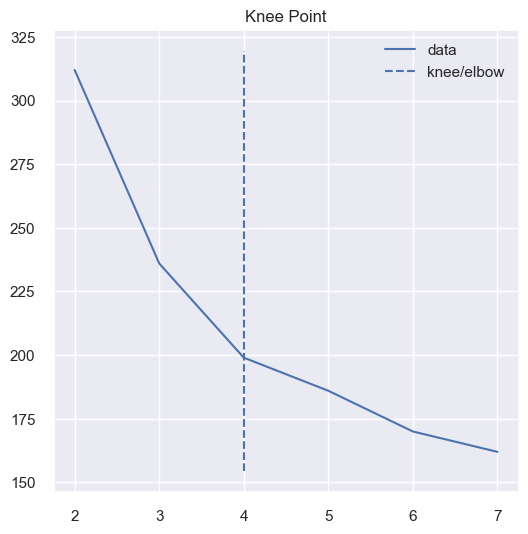

In [52]:
# check the knee of the graph
kneedle = KneeLocator(x=candidate_k,
                      y=cost_list,
                      curve="convex",
                      direction='decreasing')

kneedle.plot_knee()

In [53]:
# perform clustering for 4 cluster
kmodes = KModes(n_clusters=4)
cluster_label = kmodes.fit_predict(encoded_features)

adjusted_rand_score(label, cluster_label)

1.0